In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('hour.csv')

In [46]:
df = df.drop('dteday', axis=1)
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [47]:
# df.info()

In [48]:
# maybe change all 4 values to 3
df.weathersit.value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [49]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [50]:
# just checking the iris df from the examples
# iris = pd.read_csv('iris.csv')
# iris.head()

In [51]:
# steps to put stuff in np array as in the exercises
X = df.values
N, M = X.shape
attributeNames = df.columns.tolist()

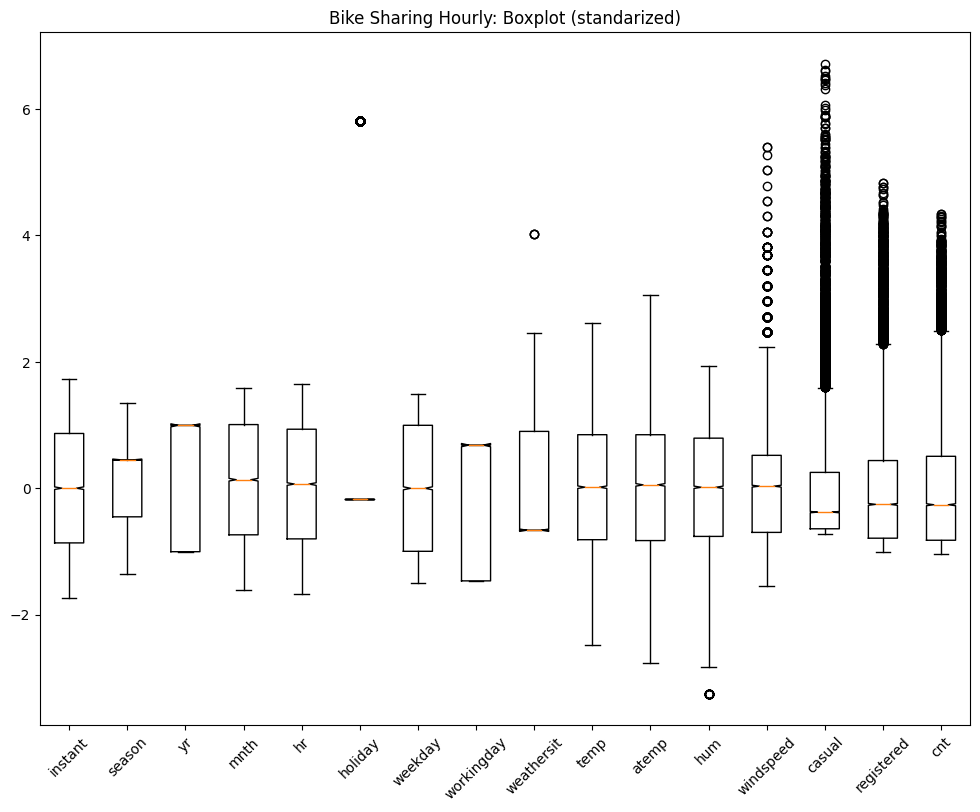

In [52]:
from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show, savefig)
import numpy as np
from scipy.io import loadmat
from scipy.stats import zscore

# standardize and plot to look for outliers
figure(figsize=(12,9))
title('Bike Sharing Hourly: Boxplot (standarized)')
boxplot(zscore(X, ddof=1), attributeNames)
xticks(range(1,M+1), attributeNames, rotation=45)
savefig('./res/plots/boxplot_standardized.png')

In [53]:
df.weathersit.value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

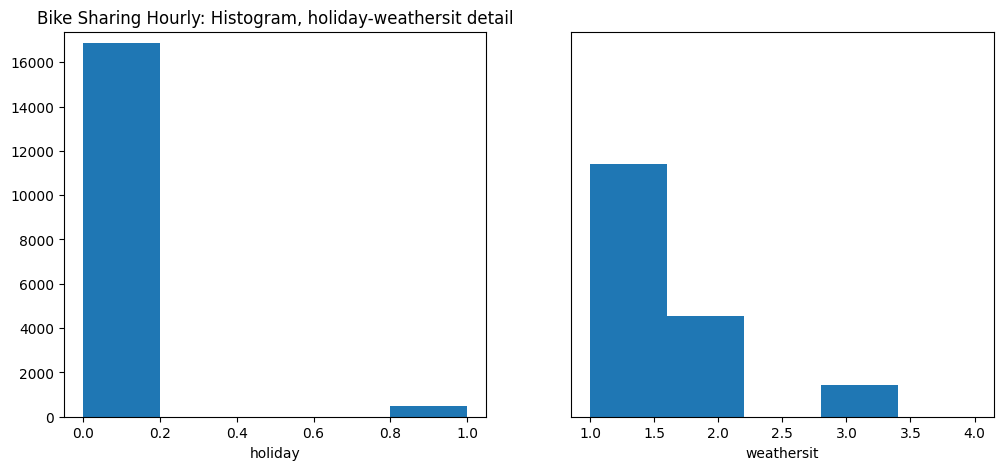

In [54]:
# hr, workingday and atemp seem to have outliers, let's check in histograms
figure(figsize=(12,5))
m = [5,8]
for i in range(len(m)):
    subplot(1,2,i+1)
    hist(X[:,m[i]], bins=5)
    xlabel(attributeNames[m[i]])
    ylim(0, N) # change this to see weathersit 4
    if i>0: yticks([])
    if i==0: title('Bike Sharing Hourly: Histogram, holiday-weathersit detail')
# savefig('./res/plots/hist_outliers.png')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


Theoretical mean:  5
Theoretical std.dev.:  2
Empirical mean:  4.981377176410183
Empirical std.dev.:  1.9672666224948008


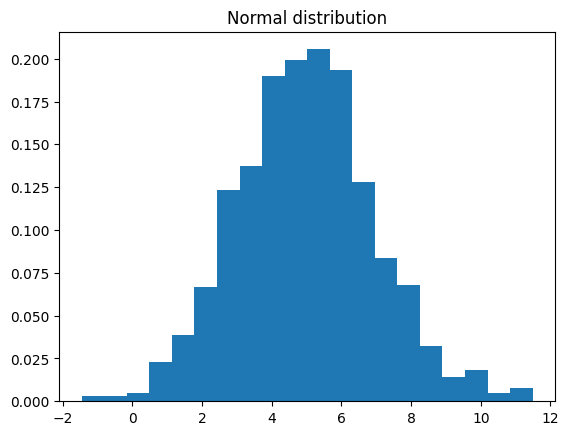

In [56]:
# check for normal distribution
# Number of samples
N = 1000

# Mean
mu = 5

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X = np.random.normal(mu,s,N).T 
# or equally:
X = np.random.randn(N).T * s + mu

# Plot the histogram
f = figure()
title('Normal distribution')
hist(X, bins=nbins, density=True)

mu_ = X.mean()
s_ = X.std(ddof=1)

print("Theoretical mean: ", mu)
print("Theoretical std.dev.: ", s)
print("Empirical mean: ", mu_)
print("Empirical std.dev.: ", s_)
savefig('./res/plots/normal_distribution.png')

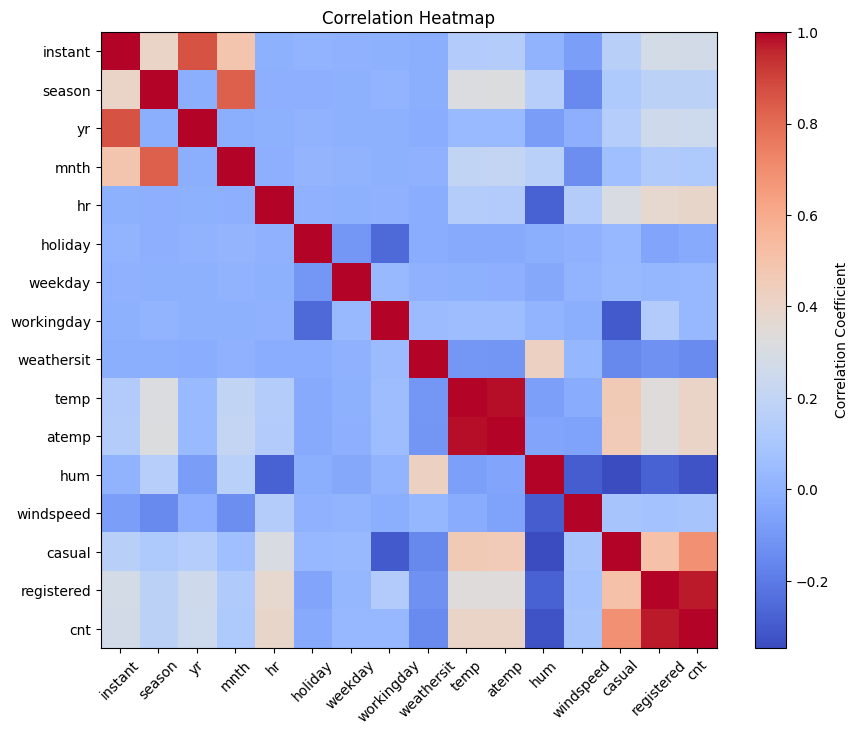

In [57]:
# check for correlation

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()
# some correlation is useless tho, like instant with season because its all measurements 
# so I think we should try cnt, which is probably the var we want to predict, against others variables

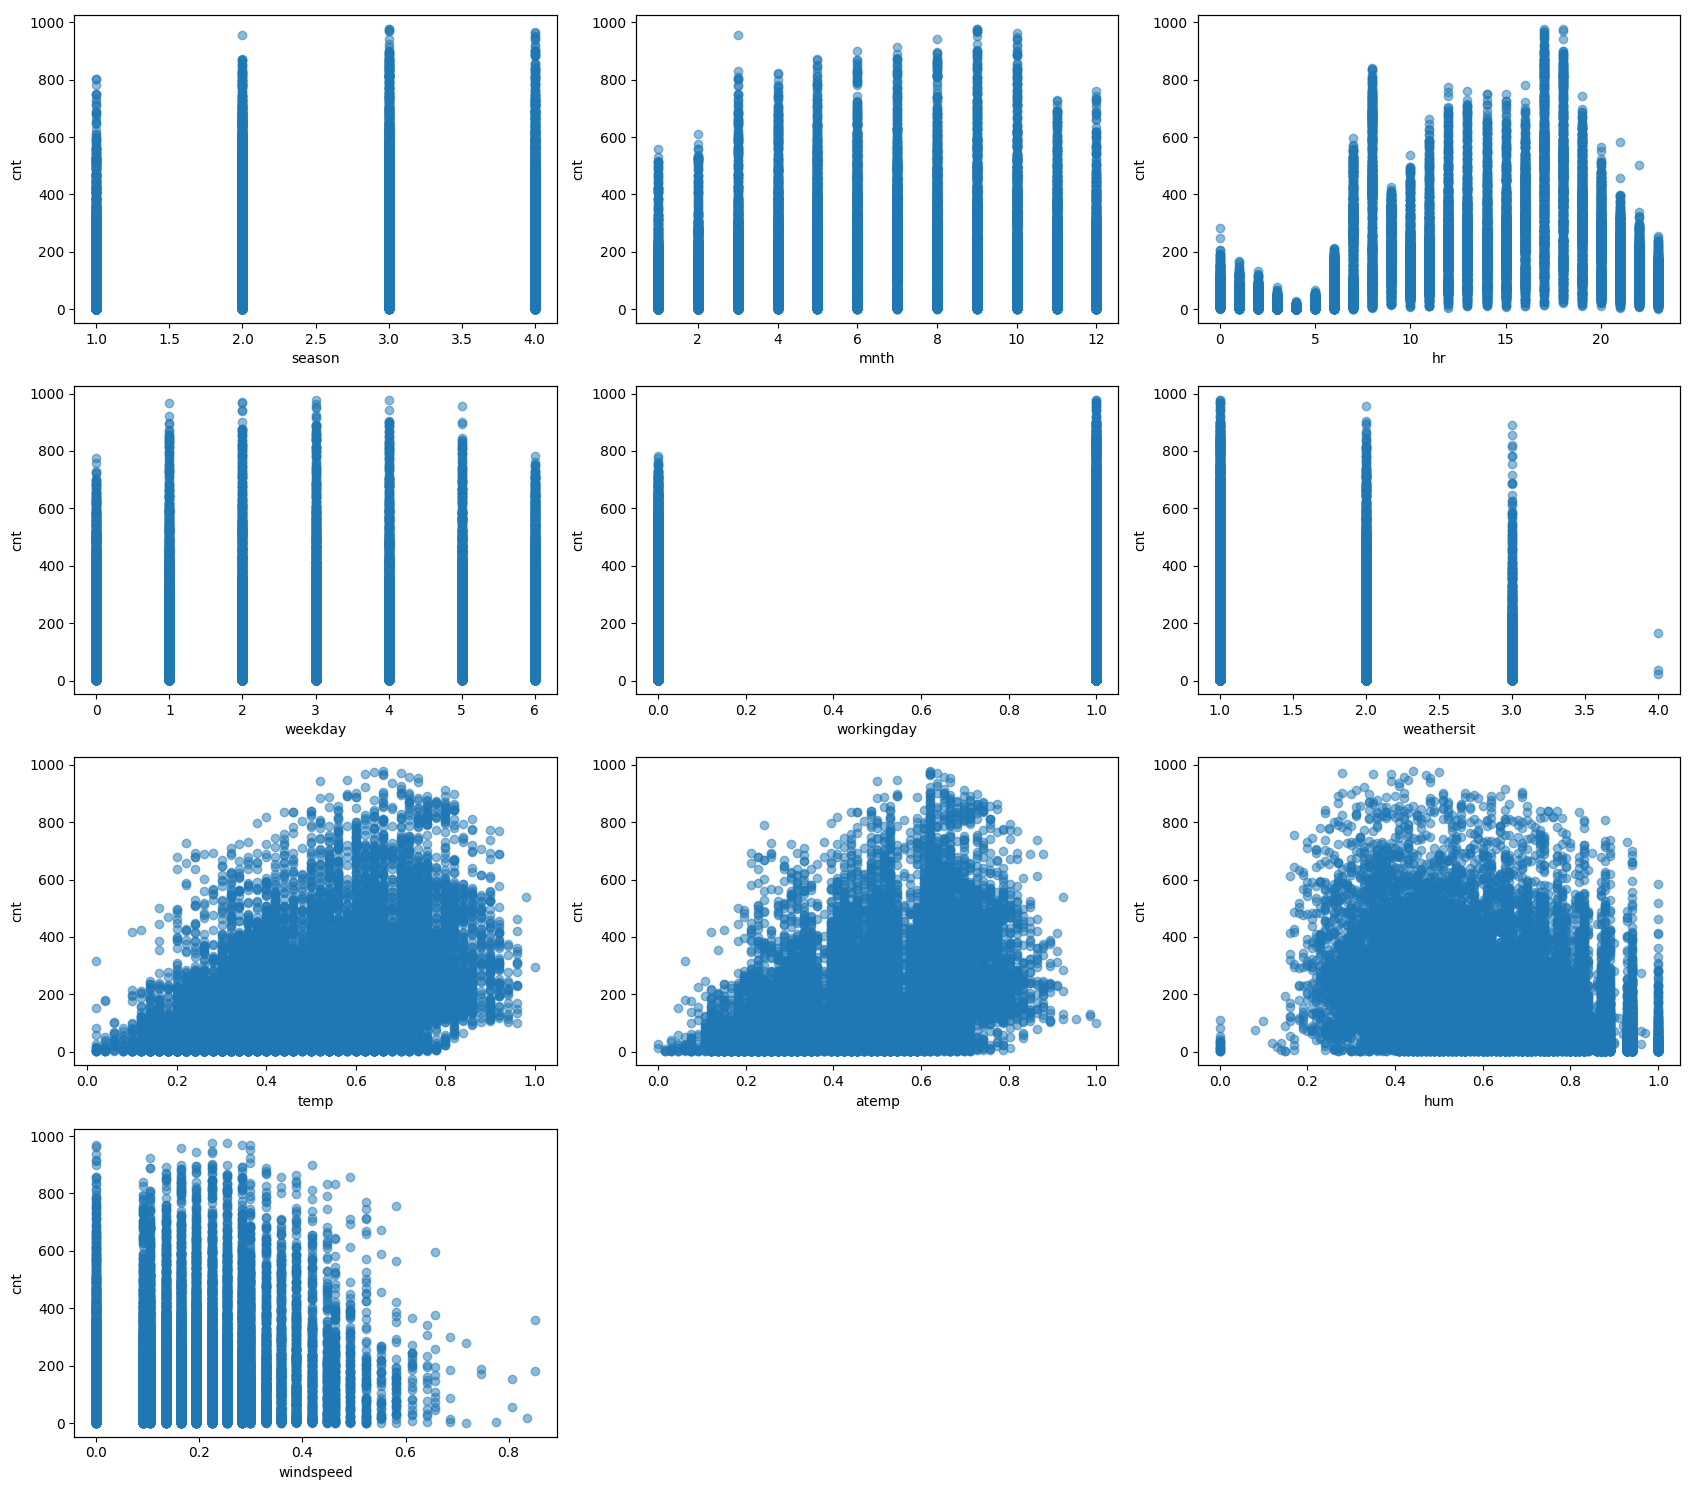

In [58]:
# Get the list of column names (variables)
variables = df.columns

interesting_vars = [1, 3, 4, 6, 7, 8, 9, 10, 11, 12]
# Calculate the number of interesting variables
num_interesting_vars = len(interesting_vars)

# Set the figure size based on the number of interesting variables
fig = plt.figure(figsize=(17, 15))

# Plot the interesting variables against the last feature
for i in range(num_interesting_vars):
    ax1 = plt.subplot(4, num_interesting_vars//3, i + 1)
    ax2 = ax1.twiny()  # Create a twin x-axis
    ax1.scatter(df.iloc[:, interesting_vars[i]], df.iloc[:, -1], alpha=0.5)
    
    # Set labels for the x and y axes
    ax1.set_xlabel(df.columns[interesting_vars[i]])
    ax1.set_ylabel(df.columns[-1])
    
    # Hide the secondary x-axis
    ax2.get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()
# fig.savefig('./res/plots/correlation.png')


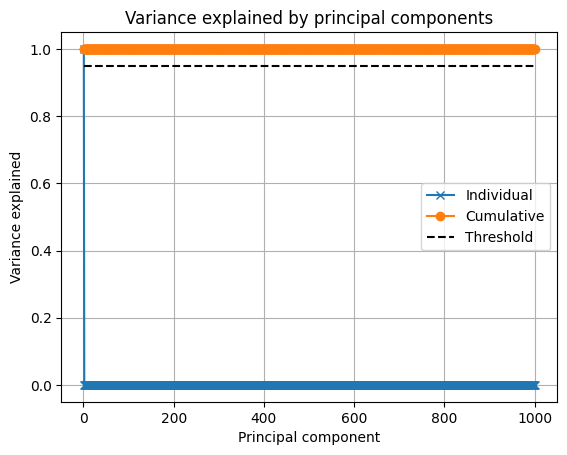

In [61]:
# df_num = df.copy() #.drop('dteday', axis=1)

# X = df_num.values

from scipy.linalg import svd
from scipy.stats import tstd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
Y = Y/tstd(X)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()
